In [15]:
#Data loading and initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'Air_Quality_Changes_in_The_US.csv'
air_quality_data = pd.read_csv(file_path)

# Display the first few rows for inspection
print(air_quality_data.head())


    CBSA Core Based Statistical Area Pollutant       Trend Statistic  \
0  10420                   Akron, OH        O3               4th Max   
1  10420                         NaN     PM2.5  Weighted Annual Mean   
2  10420                         NaN     PM2.5       98th Percentile   
3  10420                         NaN       SO2       99th Percentile   
4  10500                  Albany, GA     PM2.5  Weighted Annual Mean   

   Number of Trend Sites    1990     1991     1992     1993     1994  ...  \
0                      2    0.09    0.101    0.087    0.093    0.086  ...   
1                      3     NaN      NaN      NaN      NaN      NaN  ...   
2                      3     NaN      NaN      NaN      NaN      NaN  ...   
3                      1  161.00  183.000  181.000  209.000  132.000  ...   
4                      1     NaN      NaN      NaN      NaN      NaN  ...   

     2013   2014    2015   2016    2017    2018    2019    2020    2021   2022  
0   0.059   0.06   0.06

In [16]:
#data Cleaning and processing

air_quality_data['Core Based Statistical Area'] = air_quality_data.groupby('CBSA')['Core Based Statistical Area'].ffill()

print(air_quality_data.head(15))

     CBSA  Core Based Statistical Area Pollutant       Trend Statistic  \
0   10420                    Akron, OH        O3               4th Max   
1   10420                    Akron, OH     PM2.5  Weighted Annual Mean   
2   10420                    Akron, OH     PM2.5       98th Percentile   
3   10420                    Akron, OH       SO2       99th Percentile   
4   10500                   Albany, GA     PM2.5  Weighted Annual Mean   
5   10500                   Albany, GA     PM2.5       98th Percentile   
6   10580  Albany-Schenectady-Troy, NY        O3               4th Max   
7   10580  Albany-Schenectady-Troy, NY     PM2.5  Weighted Annual Mean   
8   10580  Albany-Schenectady-Troy, NY     PM2.5       98th Percentile   
9   10740              Albuquerque, NM        CO               2nd Max   
10  10740              Albuquerque, NM       NO2           Annual Mean   
11  10740              Albuquerque, NM       NO2       98th Percentile   
12  10740              Albuquerque, NM

In [17]:
# Handling missing values and converting to numeric
air_quality_data.iloc[:, 5:] = air_quality_data.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')
air_quality_data = air_quality_data.dropna(subset=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
 '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
 '2020', '2021', '2022'], how='any')



In [18]:
print(air_quality_data.head(825))

      CBSA        Core Based Statistical Area Pollutant  Trend Statistic  \
0    10420                          Akron, OH        O3          4th Max   
3    10420                          Akron, OH       SO2  99th Percentile   
6    10580        Albany-Schenectady-Troy, NY        O3          4th Max   
9    10740                    Albuquerque, NM        CO          2nd Max   
10   10740                    Albuquerque, NM       NO2      Annual Mean   
..     ...                                ...       ...              ...   
816  49660  Youngstown-Warren-Boardman, OH-PA        O3          4th Max   
817  49660  Youngstown-Warren-Boardman, OH-PA      PM10          2nd Max   
820  49700                      Yuba City, CA       NO2      Annual Mean   
821  49700                      Yuba City, CA       NO2  98th Percentile   
822  49700                      Yuba City, CA        O3          4th Max   

     Number of Trend Sites     1990     1991     1992     1993     1994  ...  \
0      

In [19]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 822
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CBSA                         435 non-null    int64  
 1   Core Based Statistical Area  435 non-null    object 
 2   Pollutant                    435 non-null    object 
 3   Trend Statistic              435 non-null    object 
 4   Number of Trend Sites        435 non-null    int64  
 5   1990                         435 non-null    float64
 6   1991                         435 non-null    float64
 7   1992                         435 non-null    float64
 8   1993                         435 non-null    float64
 9   1994                         435 non-null    float64
 10  1995                         435 non-null    float64
 11  1996                         435 non-null    float64
 12  1997                         435 non-null    float64
 13  1998                     

In [20]:
#Data Visualization of Temporal Trends for PM2.5, SO2, and O3 pollutants

No data available for PM2.5. Skipping...


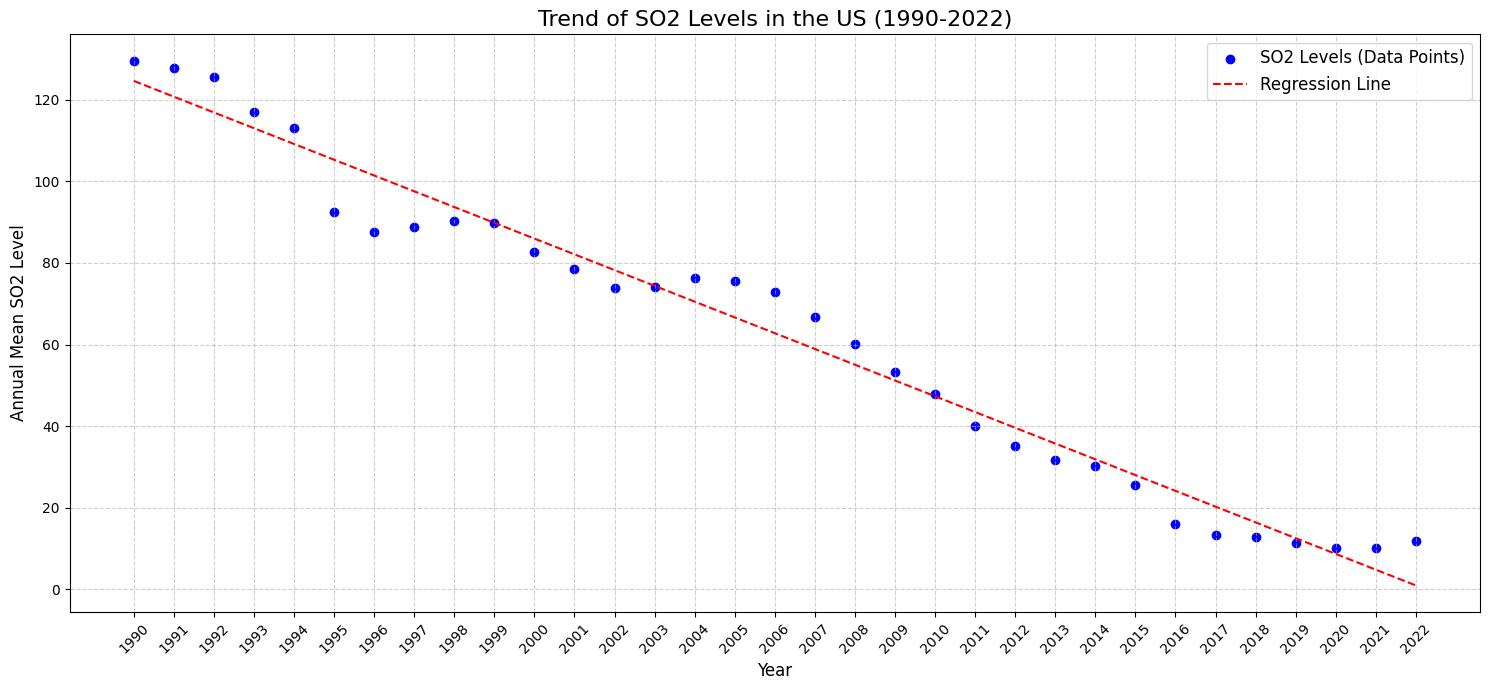

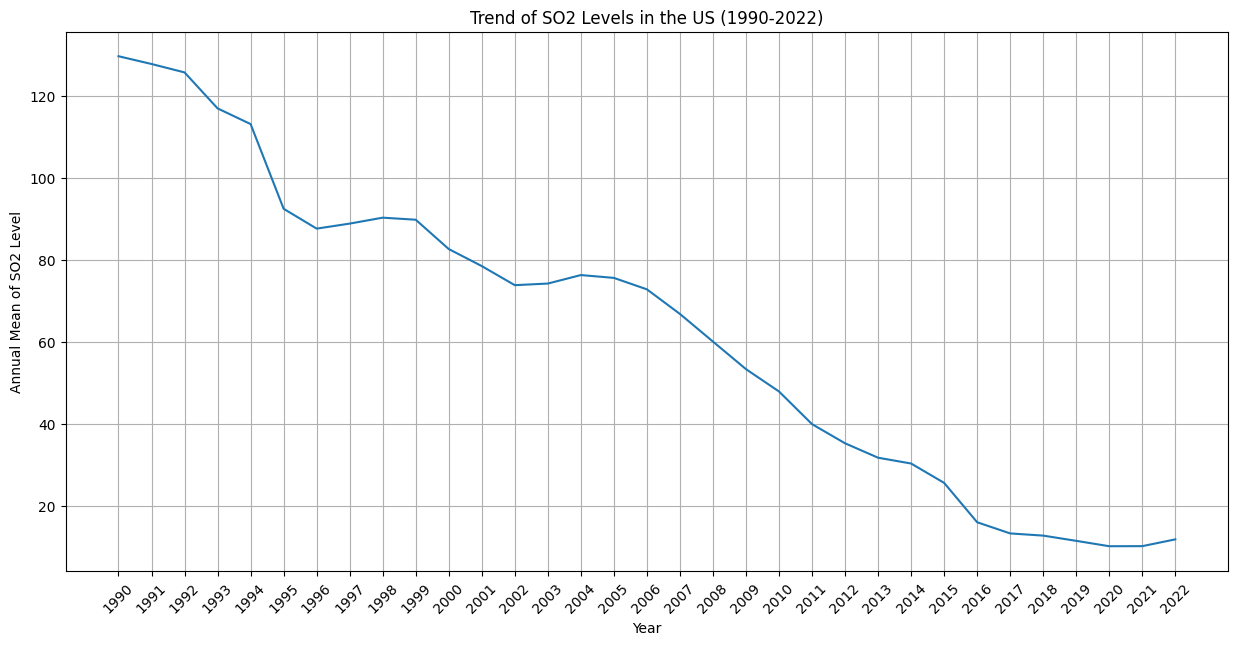

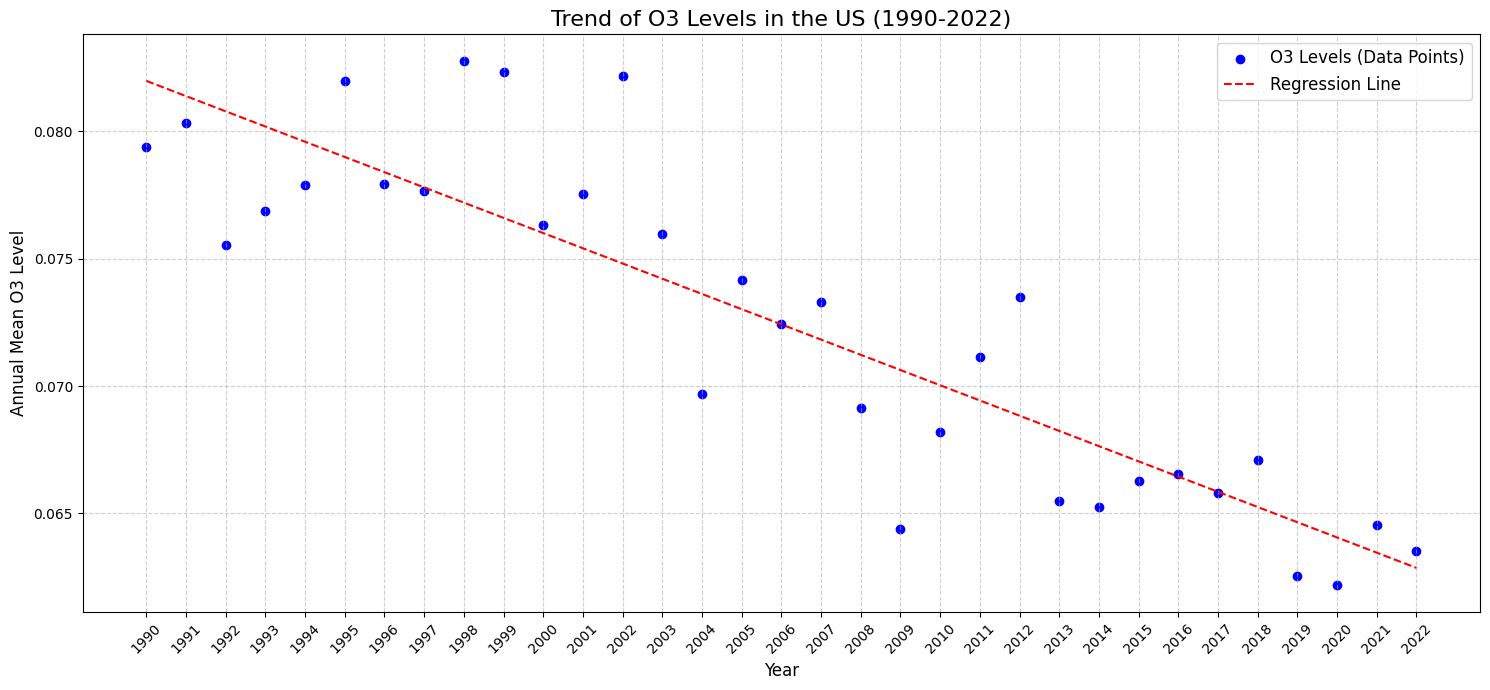

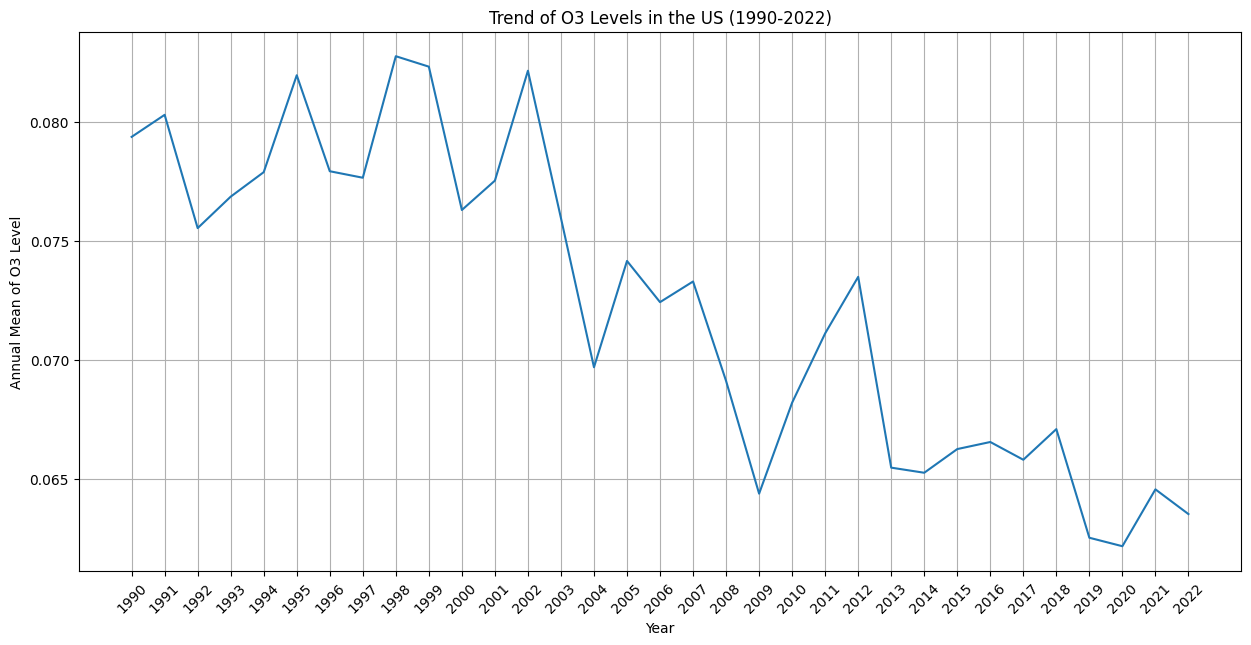

In [21]:
def plot_pollutant_trend(data, pollutant):
    """
    Plot the trend of a given pollutant over the years.
    """
    
    pollutant_data = data[data['Pollutant'] == pollutant]
    yearly_mean = pollutant_data.iloc[:, 5:].mean()  # Assuming columns 5 onward are yearly data

    # Remove NaN values from the yearly mean
    yearly_mean = yearly_mean.dropna()

    if len(yearly_mean) == 0:
        print(f"No data available for {pollutant}. Skipping...")
        return
        
    years = np.array([int(year) for year in yearly_mean.index]).reshape(-1, 1)  # Convert index to integer years
    values = yearly_mean.values.reshape(-1, 1)
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(years, values)
    trend_line = model.predict(years)
    
    # Plot the scatter plot and regression line
    plt.figure(figsize=(15, 7))
    plt.scatter(yearly_mean.index, yearly_mean.values, color='blue', label=f'{pollutant} Levels (Data Points)')
    plt.plot(yearly_mean.index, trend_line, color='red', label='Regression Line', linestyle='--')
    plt.title(f'Trend of {pollutant} Levels in the US (1990-2022)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Annual Mean {pollutant} Level', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    
    plt.show()
    

    

    plt.figure(figsize=(15, 7))
    sns.lineplot(x=yearly_mean.index, y=yearly_mean.values)
    plt.title(f'Trend of {pollutant} Levels in the US (1990-2022)')
    plt.xlabel('Year')
    plt.ylabel(f'Annual Mean of {pollutant} Level')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.show()
    
    
    


# Plotting trends for each pollutant
plot_pollutant_trend(air_quality_data, 'PM2.5')
plot_pollutant_trend(air_quality_data, 'SO2')
plot_pollutant_trend(air_quality_data, 'O3')

In [22]:
pm25_data = air_quality_data[air_quality_data['Pollutant'] == 'PM2.5']
print(pm25_data.iloc[:, 5:].head())  # Display the yearly data for PM2.5
print(pm25_data.iloc[:, 5:].isnull().sum())

Empty DataFrame
Columns: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Index: []

[0 rows x 33 columns]
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64


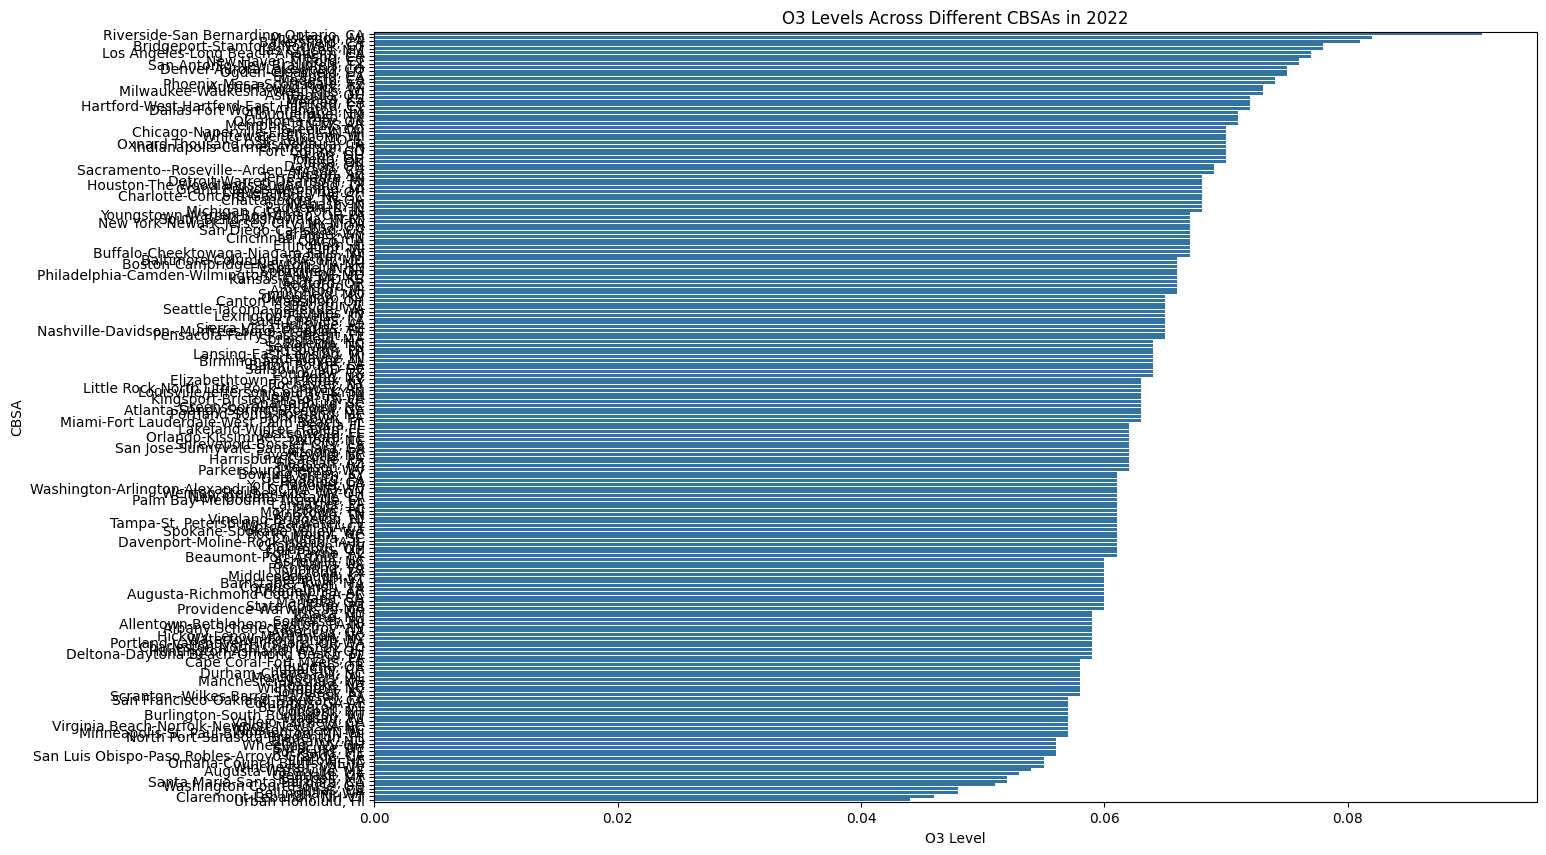

In [23]:
#Spatial analysis of PM2.5 in past year(2022) across cities in the United States
def spatial_comparison(data, pollutant, year):
    """
    Compare the levels of a given pollutant across different CBSAs for a specific year.
    """
    spatial_data = data[data['Pollutant'] == pollutant][['CBSA', 'Core Based Statistical Area', year]]
    spatial_data.dropna(subset=[year], inplace=True)  # Dropping rows where the year's data is missing

    plt.figure(figsize=(15, 10))
    sns.barplot(x=year, y='Core Based Statistical Area', data=spatial_data.sort_values(by=year, ascending=False))
    plt.title(f'{pollutant} Levels Across Different CBSAs in {year}')
    plt.xlabel(f'{pollutant} Level')
    plt.ylabel('CBSA')
    plt.show()
    

# Spatial comparison for pollutants in the most recent year
spatial_comparison(air_quality_data, 'O3', '2022')


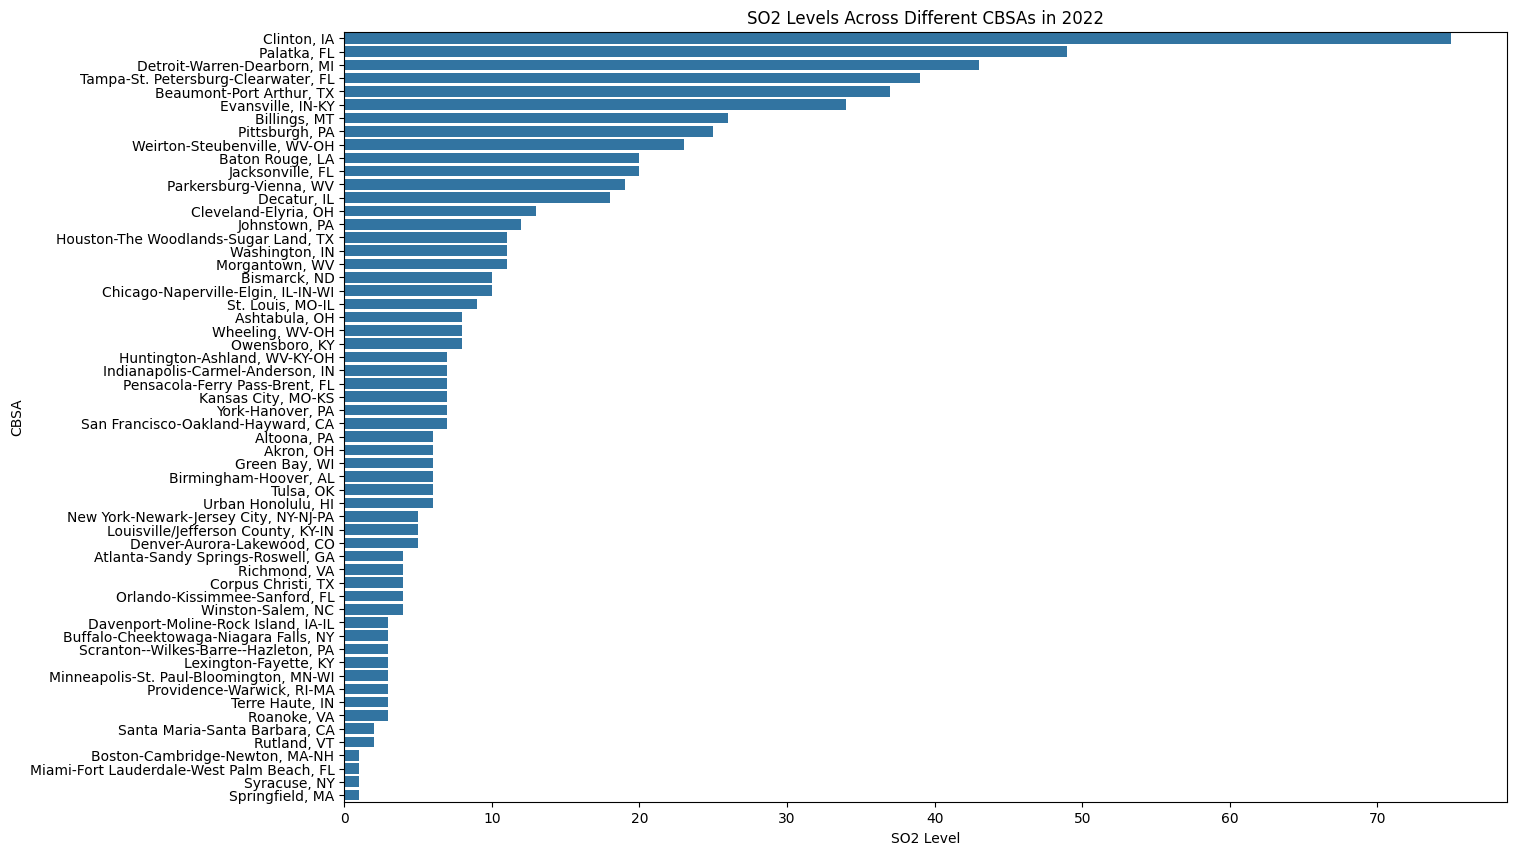

In [24]:
spatial_comparison(air_quality_data, 'SO2', '2022')


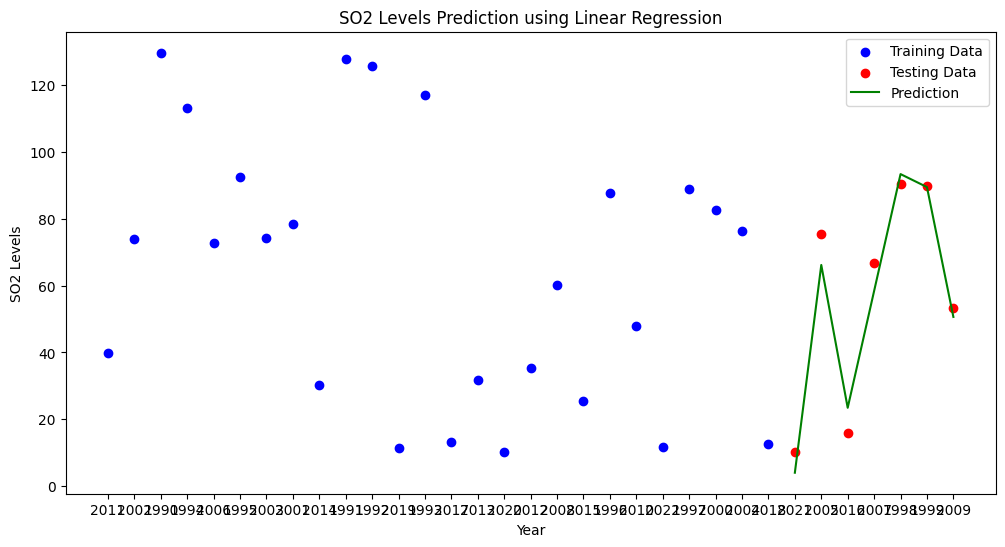

In [25]:
#Predictive Modelling for future trends using Machine learning model: Train_test_Split method
# Model takes random numbers from year for training, it takes 
# Focusing on SO2 for predictive modeling
p_data = air_quality_data[air_quality_data['Pollutant'] == 'SO2'].iloc[:, 5:].mean()
p_data_cleaned = p_data.dropna()

# Preparing the data
years_cleaned = np.array(p_data_cleaned.index).reshape(-1, 1)
p_levels_cleaned = p_data_cleaned.values

# Train-test split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(years_cleaned, p_levels_cleaned, test_size=0.2, random_state=42)

# Linear regression model
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Prediction
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Model evaluation
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

# Visualization of the model's performance
plt.figure(figsize=(12, 6))
plt.scatter(X_train_cleaned.flatten(), y_train_cleaned, color='blue', label='Training Data')
plt.scatter(X_test_cleaned.flatten(), y_test_cleaned, color='red', label='Testing Data')
plt.plot(X_test_cleaned.flatten(), y_pred_cleaned, color='green', label='Prediction')
plt.title('SO2 Levels Prediction using Linear Regression')
plt.xlabel('Year')
plt.ylabel('SO2 Levels')
plt.legend()
plt.show()




In [26]:
print("MAE:", mae_cleaned)
print("MSE:", mse_cleaned)
print("R-squared:", r2_cleaned)

MAE: 5.3457224783412
MSE: 38.36749299051688
R-squared: 0.9587575050893311
